# Yahoo finance tickers

In [4]:
import json
import math

# read file
with open('yahoo_tickers.json', 'r') as f:
    data=f.read()

# parse file
y_tickers_data = json.loads(data)

In [5]:
y_tickers = list(map(lambda x: x["symbol"], y_tickers_data["quotes"]))

In [6]:
for t in y_tickers:
    print(t)

APC.DE
TL0.DE
MC.PA
SAP.DE
OR.PA
UNA.AS
PRX.AS
ASML.AS
SAN.PA
LIN.DE
SIE.DE
ABI.BR
RDSA.AS
R6C3.DE
R6C.DE
RDSB.AS
FP.PA
ENEL.MI
VOW.DE
RMS.PA
VOW3.DE
ALV.DE
DTE.DE
ITX.MC
KER.PA
HBC1.DE
AI.PA
IBE.MC
3CP.F
BPE5.DE
SU.PA
BPE5.F
BAYN.DE
AIR.PA
AIR.DE
ADS.DE
MRK.DE
BAS.DE
DAI.DE
EL.PA
DPW.DE
GAZ.DE
GAZ.F
ABR.DE
BNP.PA
HEIA.AS
GEC.DE
DG.PA
BMW3.DE
ADYEN.AS
BMW.DE
SAF.PA
AXA.DE
CS.PA
DSY.PA
RACE.MI
SHL.DE
REN.AS
BN.PA
RI.PA
PHIA.AS
HEN3.DE
HEN.DE
MUV2.DE
VNA.DE
VODI.F
ISP.MI
IFX.DE
IES.DE
BY6.F
SAN.MC
BSD2.DE
ENGI.PA
DB1.DE
VIV.PA
AD.AS
INN1.DE
INGA.AS
ENI.MI
EDF.PA
8GC.F
DIM.PA
EOAN.DE
FRE.DE
ORA.PA
CRG.IR
CLNX.MC
ELE.MC
ACA.PA
3CP.SG
DSM.AS
STM.MI
STM.PA
BEI.DE
FME.DE
AMS.MC
RWE.DE
N3IA.F
SRT3.DE
KRZ.IR
G.MI
KBC.BR
LLD.DE
FCA.MI
NOKIA.PA
NOA3.DE
HEIO.AS
FLTR.IR
CAP.PA
BCY.DE
SGO.PA
WKL.AS
LR.PA
CON.DE
UCB.BR
AENA.MC
ZAL.DE
JDEP.AS
DHER.DE
UCG.MI
HNR1.DE
ML.PA
GRU.F
TNE5.DE
TEF.MC
CCEP.AS
PAH3.DE
AKZA.AS
NTGY.MC
BBVA.MC
DBK.DE
KBX.DE
DBK.F
EDP.LS
FER.MC
SY1.DE
DWNI.DE
TEP.PA
SGRE.MC
A5G.IR



# Data download

In [744]:
import yfinance as yf

ticker = yf.Ticker('TTE') # GS-PD | TTE | MSFT | QQQ | SPY | QLD
df = ticker.history(period='15y', interval="1d")

ticker = yf.Ticker('^VIX')
vix_df = ticker.history(period='15y', interval="1d")

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3777 entries, 2006-08-21 to 2021-08-20
Data columns (total 7 columns):
Open            3777 non-null float64
High            3777 non-null float64
Low             3777 non-null float64
Close           3777 non-null float64
Volume          3777 non-null int64
Dividends       3777 non-null float64
Stock Splits    3777 non-null int64
dtypes: float64(5), int64(2)
memory usage: 236.1 KB


In [746]:
ticker.financials

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,


In [747]:
df["vola"] = vix_df["Close"]

In [748]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,vola
Date,,,,,,,,
2006-08-21,29.971347,30.066992,29.853964,29.958305,713500,0.0,0,12.22
2006-08-22,29.845269,29.993081,29.788750,29.975691,617100,0.0,0,12.19
2006-08-23,30.236534,30.314788,29.767008,29.840914,897800,0.0,0,12.40
2006-08-24,30.197412,30.210454,29.771363,29.975691,997700,0.0,0,12.40
2006-08-25,30.006111,30.132188,29.866993,29.936554,530000,0.0,0,12.31


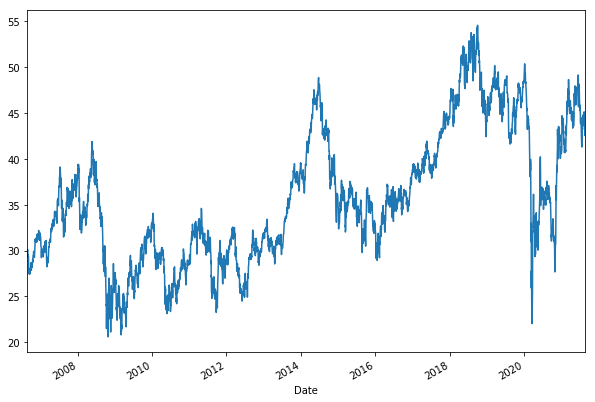

In [749]:
df['Close'].plot(figsize=(10, 7))

In [750]:
import pandas as pd

df['diff'] = (df['Close'].diff(periods=1)/df['Close'])*100
df = df[~pd.isnull(df['diff'])]

df['vola_10'] = df['diff'].rolling(window=10).std()
df = df[~pd.isnull(df['vola_10'])]

df['vola_20'] = df['diff'].rolling(window=20).std()
df = df[~pd.isnull(df['vola_20'])]

df['vola_20_annual'] = df['vola_20']*math.sqrt(252)


df['vola_30'] = df['diff'].rolling(window=30).std()
df = df[~pd.isnull(df['vola_30'])]


In [751]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,vola,diff,vola_10,vola_20,vola_20_annual,vola_30
Date,,,,,,,,,,,,,
2006-11-10,31.353831,31.353831,31.058204,31.223406,1451600,0.00,0,10.79,0.710126,1.056175,1.007169,15.988318,1.047128
2006-11-13,31.049511,31.184285,30.919090,30.953867,1633400,0.00,0,10.86,-0.870776,1.029720,1.010486,16.040960,1.040799
2006-11-14,31.240919,31.311582,30.975942,31.205591,906000,1.11,0,10.50,0.806664,1.019554,1.009511,16.025489,0.963770
2006-11-15,31.104016,31.426408,31.104016,31.342497,1019600,0.00,0,10.31,0.436805,0.966088,0.969444,15.389452,0.934395
2006-11-16,31.642800,31.717877,30.869948,30.896444,1644000,0.00,0,10.16,-1.443702,1.073068,0.947899,15.047425,0.986907


In [752]:
df[df['Dividends'] > 0].tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,vola,diff,vola_10,vola_20,vola_20_annual,vola_30
Date,,,,,,,,,,,,,
2020-06-25,35.356204,36.385997,35.244876,36.339607,1565300,0.769,0,32.220001,2.218532,2.008050,3.244350,51.502465,3.063061
2020-09-23,32.561026,32.580007,31.460158,31.469646,2510700,0.780,0,28.580000,-2.533172,1.520048,1.463790,23.236951,1.495143
2020-12-30,41.438602,41.699709,41.138815,41.264530,1506700,0.808,0,22.770000,0.370288,1.476389,1.841809,29.237811,2.485870
2021-03-23,44.944989,45.633274,44.738504,44.935158,2728400,0.785,0,20.299999,-2.527352,2.012582,1.755504,27.867762,1.910919
2021-06-22,47.160000,47.389999,46.810001,47.080002,1977600,0.803,0,16.660000,-0.206024,2.088040,1.672425,26.548917,1.668743


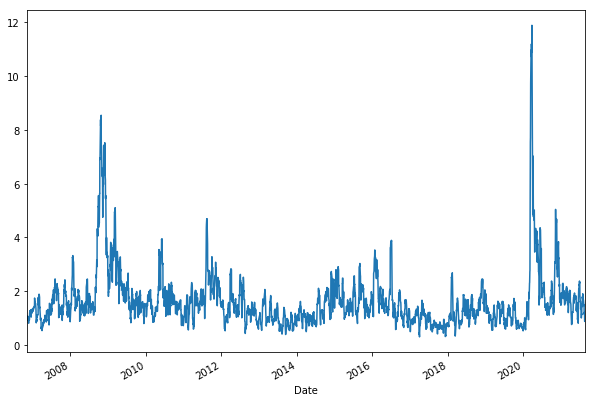

In [753]:
df['vola_10'].plot(figsize=(10, 7))

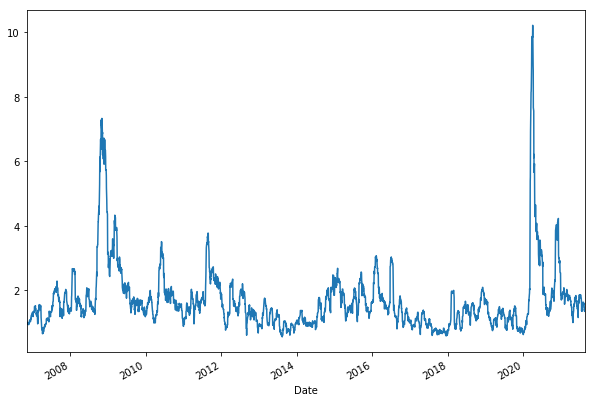

In [754]:
df['vola_20'].plot(figsize=(10, 7))

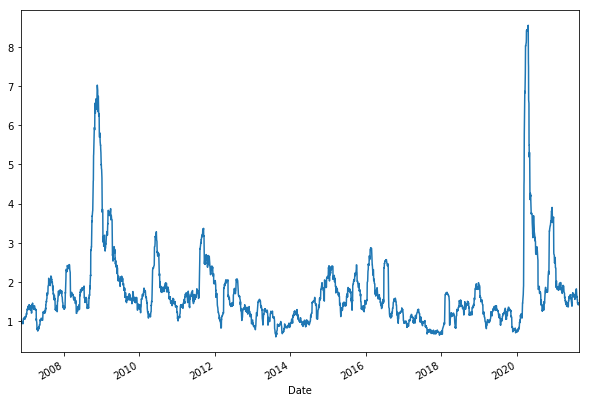

In [755]:
df['vola_30'].plot(figsize=(10, 7))

In [756]:
from scipy.stats import norm

def call_price(sp, st, r, t, vol, d):
    d1 = (math.log(sp/st) + (r - d + ((vol**2)/2))*t)/(vol*math.sqrt(t))
    d2 = d1 - vol*math.sqrt(t)
    return sp*math.exp(-d*t)*norm.cdf(d1) - st*math.exp(-r*t)*norm.cdf(d2)

def put_price(sp, st, r, t, vol, d):
    d1 = (math.log(sp/st) + (r - d + ((vol**2)/2))*t)/(vol*math.sqrt(t))
    d2 = d1 - vol*math.sqrt(t)
    return st*math.exp(-r*t)*norm.cdf(-d2) - sp*math.exp(-d*t)*norm.cdf(-d1)

In [768]:
def find_itm_strike(price, dte, delta):
    strike_price = math.floor(price)-1
    d = call_price(price+1, strike_price, rate, dte/365,long_iv/100,0) - call_price(price, strike_price, rate, dte/365,long_iv/100,0)
    while d < delta and strike_price > 0:
        strike_price = strike_price - 1
        d = call_price(price+1, strike_price, rate, dte/365,long_iv/100,0) - call_price(price, strike_price, rate, dte/365,long_iv/100,0)
    
    if strike_price <= 0:
        raise ValueError('couldnt find itm strike')

    return strike_price

def find_otm_strike(price, dte, delta):
    strike_price = math.floor(price)+1
    d = call_price(price+1, strike_price, rate, dte/365,short_iv/100,0) - call_price(price, strike_price, rate, dte/365,short_iv/100,0)
    while d > delta and strike_price < (price*2):
        strike_price = strike_price + 1
        d = call_price(price+1, strike_price, rate, dte/365,short_iv/100,0) - call_price(price, strike_price, rate, dte/365,short_iv/100,0)
    
    if strike_price <= 0:
        raise ValueError('couldnt find leaps')

    return strike_price

In [757]:
call_price(361.3, 290, 0.005, 520/365,50.8/100,0)*0.9

106.2799488616132

In [758]:
series_data = df[['Close', 'Dividends', 'vola']].reset_index().to_numpy()

# Global params

In [759]:
daily_investment = 500/30 # how much to invest every monthly divided by 30 to get daily investment
OPT_CONT_SIZE = 100
init_cap = 9000

# Wheel strategy


In [760]:

# Strategy params
call_opt_percent_strike = 0.03 # % abose/below current price
put_opt_percent_strike = 0.03 # % abose/below current price
opt_duration = 22 # 30 days - 22 trading days
opt_duration_reel = 30 # 30 days - 22 trading days
commissions_per_trade = 0
divi_tax_rate = 0.3 # dividend tax
gain_tax_rate = 0 # 0.3 # capital gains tax



In [761]:
print('starting with: {}'.format(init_cap))

starting with: 9000


In [762]:
import datetime

# Account
capital = init_cap
puts = 0
calls = 0
cash_earnings = 0
invested = init_cap
shares = 0
balance = 0
free_capital = init_cap

strike = 0
call_exp_date = None
put_exp_date = None

for idx, data in enumerate(series_data):
    date, price, divi, vola = data[0].date(), data[1], data[2], data[3]

    iv = vola*(opt_duration_reel/25)
    f_divi = 0

    # Monthly investment (spread daily)
    invested = invested + daily_investment

    capital = capital + divi*shares*(1-divi_tax_rate) + daily_investment
    cash_earnings = cash_earnings + divi*shares*(1-divi_tax_rate)

    free_capital = capital - (-puts*strike*OPT_CONT_SIZE)

    share_buying_power = math.floor(free_capital/price)
    if(share_buying_power >= 1):
        shares = shares + share_buying_power
        capital = capital - share_buying_power*price
        free_capital = capital - (-puts*strike*OPT_CONT_SIZE)


    if((shares >= OPT_CONT_SIZE and calls == 0) or (calls !=0 and isinstance(call_exp_date, datetime.date) and call_exp_date <= date)):
        put_exp_date = None
        # sell covered call
        strike = price*(1+call_opt_percent_strike)
        strike = (math.ceil(strike)+math.floor(strike))/2

        # get futures dividend
        f_divi = 0
        for i in range(idx+1, min(idx+opt_duration+1, len(series_data))):
            if(series_data[i][2] != 0):
                f_divi = series_data[i][2]

        calls = -math.floor(shares/OPT_CONT_SIZE)

        prem = call_price(price, strike, 0.005, opt_duration_reel/365,iv/100,f_divi/price)*OPT_CONT_SIZE*abs(calls)*(1-gain_tax_rate)
        capital = capital + prem - commissions_per_trade*abs(puts)
        cash_earnings = cash_earnings + prem - commissions_per_trade*abs(puts)

        call_exp_date = date + datetime.timedelta(days=opt_duration_reel)

        print('sell covered call')
        print('date: {}'.format(date))
        print('calls: {}'.format(calls))
        print('price: {}'.format(price))
        print('strike: {}'.format(strike))
        print('premium: {}'.format(prem))
        print('call_exp_date: {}'.format(call_exp_date))
        print('vola: {}'.format(vola))
        print('shares: {}'.format(shares))
        print('capital: {}'.format(capital))
        print('free_capital: {}'.format(free_capital))
        print('balance: {}'.format(balance))
        print('-----')

    if ((shares < 100 and puts == 0 and math.floor(capital/(strike*OPT_CONT_SIZE)) >= 1) or (puts !=0 and isinstance(put_exp_date, datetime.date) and put_exp_date <= date)):
        call_exp_date = None
        # sell cash covered put
        strike = price*(1-put_opt_percent_strike)
        strike = (math.ceil(strike)+math.floor(strike))/2

        puts = -max(math.floor(capital/(strike*OPT_CONT_SIZE)), 1)

        # get futures dividend
        f_divi = 0
        for i in range(idx+1, min(idx+opt_duration+1, len(series_data))):
            if(series_data[i][2] != 0):
                f_divi = series_data[i][2]
 
        prem = put_price(price, strike, 0.005, opt_duration_reel/365,iv/100,f_divi/price)*OPT_CONT_SIZE * abs(puts)*(1-gain_tax_rate)
        capital = capital + prem - commissions_per_trade*abs(puts)
        cash_earnings = cash_earnings + prem - commissions_per_trade*abs(puts)

        put_exp_date = date + datetime.timedelta(days=opt_duration_reel)

        print('sell cash covered put')
        print('date: {}'.format(date))
        print('puts: {}'.format(puts))
        print('price: {}'.format(price))
        print('strike: {}'.format(strike))
        print('premium: {}'.format(prem))
        print('put_exp_date: {}'.format(put_exp_date))
        print('vola: {}'.format(vola))
        print('shares: {}'.format(shares))
        print('capital: {}'.format(capital))
        print('free_capital: {}'.format(free_capital))
        print('balance: {}'.format(balance))
        print('-----')

    if (calls != 0 and price > strike):
        # Shares get called
        print('Shares get called')
        print('date: {}'.format(date))
        print('price: {}'.format(price))
        print('strike: {}'.format(strike))

        shares_in_contracts = -calls*OPT_CONT_SIZE
        capital = capital + shares_in_contracts*strike
        shares = shares - shares_in_contracts
        calls = 0
        call_exp_date = None
        print('capital: {}'.format(capital))
        print('free_capital: {}'.format(free_capital))
        print('balance: {}'.format(balance))
        print('-----')

    if (puts != 0 and price < strike):
        # Get assigned shares
        print('Get assigned shares')
        print('date: {}'.format(date))
        print('price: {}'.format(price))
        print('strike: {}'.format(strike))
        
        shares_in_contracts = -puts*OPT_CONT_SIZE
        capital = capital - shares_in_contracts*strike
        shares = shares + shares_in_contracts
        puts = 0
        put_exp_date = None
        print('capital: {}'.format(capital))
        print('free_capital: {}'.format(free_capital))
        print('balance: {}'.format(balance))
        print('-----')
    balance = capital + shares*price

8024.3626327483
-----
Shares get called
date: 2018-09-25
price: 54.267391204833984
strike: 53.5
capital: 749041.6535968743
free_capital: 41.653596874375886
balance: 764194.8939660353
-----
sell covered call
date: 2018-09-26
calls: -141
price: 53.942543029785156
strike: 55.5
premium: 5468.98571045631
call_exp_date: 2018-10-26
vola: 12.890000343322754
shares: 14196
capital: 5481.153462400584
free_capital: 12.167751944274642
balance: 765864.5448703729
-----
sell covered call
date: 2018-10-26
calls: -143
price: 48.17844772338867
strike: 49.5
premium: 15022.096212041435
call_exp_date: 2018-11-25
vola: 24.15999984741211
shares: 14304
capital: 15032.486054701216
free_capital: 10.389842659780712
balance: 693069.785702696
-----
sell covered call
date: 2018-11-26
calls: -146
price: 45.60459518432617
strike: 46.5
premium: 11435.622023261489
call_exp_date: 2018-12-26
vola: 18.899999618530273
shares: 14626
capital: 11437.855111399796
free_capital: 2.2330881383083394
balance: 657618.2443427668
-----

In [763]:
print(invested)
print(capital)
print(shares)
print(strike)
print(balance)
print(cash_earnings)
print(shares)

70983.33333333107
41.94150482837724
33659
45.5
1437617.8006890935
1732166.4320316631
33659


In [764]:
returns = (balance/invested) - 1
annual_returns = math.pow((1+returns), 365/len(series_data)) - 1

print('returns: {}%'.format(round(returns*100,2)))
print('annual returns: {}%'.format(round(annual_returns*100,2)))

returns: 1925.29%
annual returns: 34.35%


** Historical volatility plays a big part in choosing the call/put strikes **

# Buy hold strategy (benchmark)

In [765]:
# buy shares @ init price
capital = 0
hld_balance = 0
hld_cash_earnings = 0
shares = math.floor(init_cap/series_data[0][1])

for idx, data in enumerate(series_data):
    date, price, divi, vola = data[0].date(), data[1], data[2], data[3]
    
    capital = capital + (divi*shares*(1-divi_tax_rate)) + daily_investment
    hld_cash_earnings = hld_cash_earnings + (divi*shares*(1-divi_tax_rate))

    share_buying_power = math.floor(capital/price)
    if(share_buying_power >= 1):
        shares = shares + share_buying_power
        capital = capital - share_buying_power*price

hld_balance = capital + shares*price

In [766]:
print(capital)
print(shares)
print(hld_balance)
print(hld_cash_earnings)
print((hld_cash_earnings/len(series_data))*30)

11.18938953755952
3609
154151.57608539937
56197.310399999995
453.32597795106204


In [767]:
hld_returns = (hld_balance/invested)-1
hld_annual_returns = math.pow((1+hld_returns), 365/len(series_data)) - 1

print('hld_returns: {}%'.format(round(hld_returns*100,2)))
print('hld_annual_returns: {}%'.format(round(hld_annual_returns*100,2)))

hld_returns: 117.17%
hld_annual_returns: 7.91%


# Poor Man's Covered Call strategy

### Global params

In [776]:
long_iv = 26
short_iv = 17
mid_iv = 20

premium_discount = 0.1

rate = 0.007

leaps_dte = 800
leaps_delta = 0.7
leaps_dte_limit = 60

short_dte = 16
short_delta = 0.25
short_dte_limit = 4
short_profit_limit = 0.5 # 1-short_profit_limit == %P
short_loss_limit = 1.9 # 1-short_loss_limit == %L

In [777]:
find_itm_strike(361.3, 520, 0.8)

295

In [778]:
find_otm_strike(361.3, 16, 0.3)

369

In [779]:
import datetime

free_capital = init_cap
invested = init_cap

leaps_cnt = 0
leaps_exp_date = None
leaps_strike = 0

short_cnt = 0
short_exp_date = None
short_strike = 0

for idx, data in enumerate(series_data):
    date, price, divi, vola = data[0].date(), data[1], data[2], data[3]

    mid_iv = vola
    short_iv = (short_dte/25)*vola
    mid_iv = 1.1*vola
    long_iv = mid_iv*1.3

    # Monthly investment (spread daily)
    free_capital = free_capital + daily_investment
    invested = invested + daily_investment

    # BTO leaps
    if leaps_cnt == 0:
        leaps_strike = find_itm_strike(price, leaps_dte, leaps_delta)
        leaps_price = OPT_CONT_SIZE*call_price(price, leaps_strike, rate, leaps_dte/365,long_iv/100,0)
        leaps_cnt = math.floor(free_capital/leaps_price)
        free_capital = free_capital - leaps_cnt*leaps_price
        leaps_exp_date = date + datetime.timedelta(days=leaps_dte)
        print(date)
        print('BTO leaps')
        print(free_capital)

    # STC leaps
    elif (leaps_exp_date - date).days <= leaps_dte_limit or idx == (len(series_data)-1):
        free_capital = free_capital + leaps_cnt*OPT_CONT_SIZE*call_price(price, leaps_strike, rate, (leaps_exp_date - date).days/365,mid_iv/100,0)
        leaps_exp_date = None
        leaps_cnt = 0
        leaps_strike = 0
        print(date)
        print('STC leaps')
        print(free_capital)

    # STO covered calls
    if leaps_cnt > 0 and short_cnt == 0 and free_capital > 0: 
        short_strike = find_otm_strike(price, short_dte, short_delta)
        short_price = OPT_CONT_SIZE*call_price(price, short_strike, rate, short_dte/365,short_iv/100,0)
        short_cnt = leaps_cnt
        free_capital = free_capital + short_cnt*short_price
        short_exp_date = date + datetime.timedelta(days=short_dte)
        print(date)
        print(price)
        print('sell {} CCs @{} for: {}, expiring: {}'.format(short_cnt, short_strike, short_cnt*short_price, short_exp_date))
        print(free_capital)

    if short_cnt > 0:
        curr_short_price = OPT_CONT_SIZE*call_price(price, short_strike, rate, (short_exp_date - date).days/365,short_iv/100,0)
        
        # BTC covered calls
        if (((short_exp_date - date).days <= short_dte_limi)t or( idx ==(len(series_data)-)1 or( curr_short_price/short_price<== short_profit_limi) or (curr_short_price/short_price >= short_loss_limit))
            free_capital = free_capital - short_cnt*curr_short_price
            print(date)
            print(price)
            print('buy back {} CCs @{} for: {}'.format(short_cnt, short_strike, short_cnt*curr_short_price))
            short_exp_date = None
            short_cnt = 0
            short_strike = 0
            short_price = 00            print(free_capital)



print(free_capital)
print(invested)


43.90286636352539
buy back 41 CCs @45 for: 185.87002374599902
374.3352502521377
2020-02-12
44.34804153442383
sell 41 CCs @46 for: 31.37164564099837, expiring: 2020-02-28
422.3735625598028
2020-02-13
43.796024322509766
buy back 41 CCs @46 for: 4.094872545016318
434.9453566814532
2020-02-14
43.8138313293457
sell 41 CCs @45 for: 111.82468508925716, expiring: 2020-03-01
563.436708437377
2020-02-18
43.32414627075195
buy back 41 CCs @45 for: 15.574958706360476
564.5284163976831
2020-02-19
43.47550582885742
sell 41 CCs @45 for: 53.403506502026254, expiring: 2020-03-06
634.5985895663761
2020-02-20
43.048133850097656
buy back 41 CCs @45 for: 18.71647221567455
632.5487840173681
2020-02-21
42.736515045166016
sell 41 CCs @44 for: 201.68630756016057, expiring: 2020-03-08
850.9017582441953
2020-02-24
40.54627227783203
buy back 41 CCs @44 for: 5.627277395025865
861.9411475158361
2020-02-25
39.31759262084961
sell 41 CCs @41 for: 409.4346271231447, expiring: 2020-03-12
1288.0424413056473
2020-03-03
38

In [780]:
returns = (free_capital/invested) - 1
annual_returns = math.pow((1+returns), 365/len(series_data)) - 1

print('returns: {}%'.format(round(returns*100,2)))
print('annual returns: {}%'.format(round(annual_returns*100,2)))

returns: -86.95%
annual returns: -18.12%


# Just LEAPS

In [781]:
import datetime

free_capital = init_cap
invested = init_cap

leaps_cnt = 0
leaps_exp_date = None
leaps_strike = 0

for idx, data in enumerate(series_data):
    date, price, divi, vola = data[0].date(), data[1], data[2], data[3]

    # Monthly investment (spread daily)
    free_capital = free_capital + daily_investment
    invested = invested + daily_investment

    # BTO leaps
    if leaps_cnt == 0:
        leaps_strike = find_itm_strike(price, leaps_dte, leaps_delta)
        leaps_price = OPT_CONT_SIZE*call_price(price, leaps_strike, rate, leaps_dte/365,long_iv/100,0)
        leaps_cnt = math.floor(free_capital/leaps_price)
        free_capital = free_capital - leaps_cnt*leaps_price
        leaps_exp_date = date + datetime.timedelta(days=leaps_dte)

    # STC leaps
    elif (leaps_exp_date - date).days <= leaps_dte_limit or idx == (len(series_data)-1):
        free_capital = free_capital + leaps_cnt*OPT_CONT_SIZE*call_price(price, leaps_strike, rate, (leaps_exp_date - date).days/365,mid_iv/100,0)
        leaps_exp_date = None
        leaps_cnt = 0
        leaps_strike = 0


print(free_capital)
print(invested)

26505.101654239777
70983.33333333107


In [782]:
returns = (free_capital/invested) - 1
annual_returns = math.pow((1+returns), 365/len(series_data)) - 1

print('returns: {}%'.format(round(returns*100,2)))
print('annual returns: {}%'.format(round(annual_returns*100,2)))

returns: -62.66%
annual returns: -9.22%


- **LEAPS and PMCC work on longterm growth bullish stocks**
- **The wheel works generally better, but is more capital intesive**
- **On a long term bullish play, LEAPS are supreme**
- **The long dated LEAPS the better**